# ALGORITMO DE GROVER

Si tenemos una lista de N elementos y queremos buscar uno en esfecífico, en el pero de los casos haríamos N pruebas, este algritmo reduce las pruebas a solo $\sqrt(N)$.

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

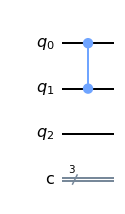

In [27]:
Detector = QuantumCircuit(3,3)
Detector.cz(1,0)
Detector.draw(output = "mpl")

/var/folders/4p/fdj6h8qx6mz3y02dqg11dsjw0000gp/T/ipykernel_905/3042471730.py:5: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + Detector
/var/folders/4p/fdj6h8qx6mz3y02dqg11dsjw0000gp/T/ipykernel_905/3042471730.py:7: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + Detector


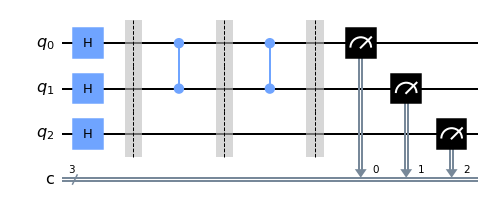

In [28]:
Grover = QuantumCircuit(3,3)

Grover.h(range(3))
Grover.barrier(range(3))
Grover = Grover + Detector
Grover.barrier(range(3))
Grover = Grover + Detector
Grover.barrier(range(3))
Grover.measure(range(3),range(3))

Grover.draw(output = "mpl")

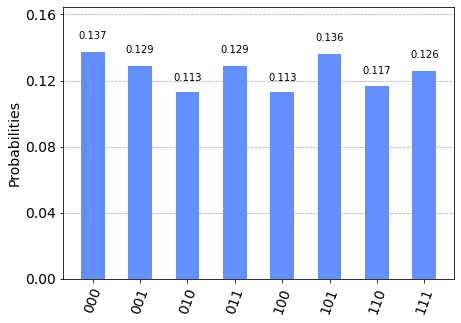

In [29]:
backend = Aer.get_backend("qasm_simulator")
job = execute(Grover, backend, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# ALGORITMO DE SHOR

Queremos encontrar el periodo de la función $f(i)=x^i \mod (N)$, con ayuda de la QFT.
\
El periodo es el mínimo entero $r$ tal que un número $x \in$ (2,N-1) es congruente con $1$ módulo N.
\
Es decir, $r$ es el periodo de $x \in$ (2,N-1) si $x^r \equiv 1 \mod N$


Tenemos que x es una raiz cuadrada no trivial de $N = pq$, con $p$ y $q$ primos si
- x $\in (2, N-1)$
- $x^2 \equiv 1 \mod (N)$
\
Así, buscamos raices no triviales, es sificiente con periodo par. 
\
Tenemos lo siguiente:

$$x^2 - 1 \equiv 0 \mod N \Rightarrow (x+1)(x-1) \equiv 0 \mod N$$
\
Podemos tomar los factores de (x-1) y (x+1) de la siguinte manera:
$$(x-1) = x_1 \cdot x_2 \cdot  \dotsc \cdot  x_n$$
$$(x+1) = y_1 \cdot y_2 \cdot  \dotsc \cdot  y_n$$
\
Claro que p y q se encuentran en uno de estos factores, pero no existe la posibilidad de que p y q se encuntren ambos en $(x-1)$ o ambos en $(x+1)$.
\
Tenemos que $(x+1)<N$ y $(x-1)<N$, entonces calculamos lo siguiente:
\
$$mcd(x-1,N) \text{ y }  mcd(x+1,N)$$
\
Éstos serán los factores primos de nuestro número N.

EJEMPLO: Factorizar 15 como producto de primos.
- Tomamos al azar un  número en (2, 15-2) = (2,13)
- Calculamos su periodo usando la función $f(x) = 7^x \mod 15 $. 
- Vemos si tiene orden 2 o par con ayuda de la QFT.
- Obtenemos los factores primos
- Calculamos $mcd(x-1,15) \text{ y }  mcd(x+1,15)$

## Programar el algoritmo de Shor 01

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi

In [2]:
def _7mod15():
        
    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate

In [3]:
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)
        
        for j in range(i - 1, -1, -1): 
            qft_circ.cu1(pi/(2 ** (i - j)), j, i)
 
        
    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

/var/folders/4p/fdj6h8qx6mz3y02dqg11dsjw0000gp/T/ipykernel_1121/2020941756.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qft_circ.cu1(pi/(2 ** (i - j)), j, i)


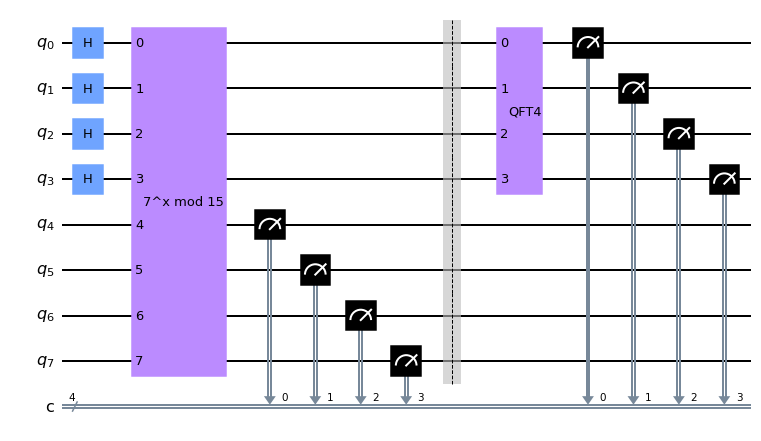

In [4]:
circ = QuantumCircuit(8,4)
circ.h(range(4))
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.barrier(range(8))
circ.append(QFT(4), range(4))
circ.measure(range(4), range(4))
circ.draw(output = 'mpl')

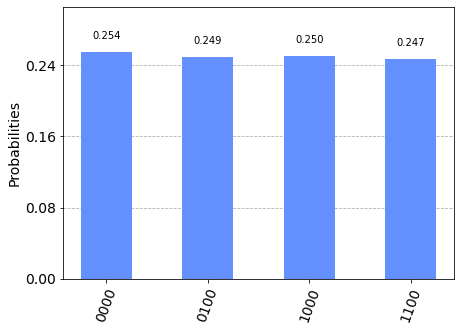

In [5]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 100000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Programar el algoritmo de Shor 02

In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi

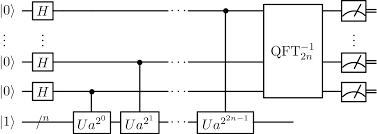

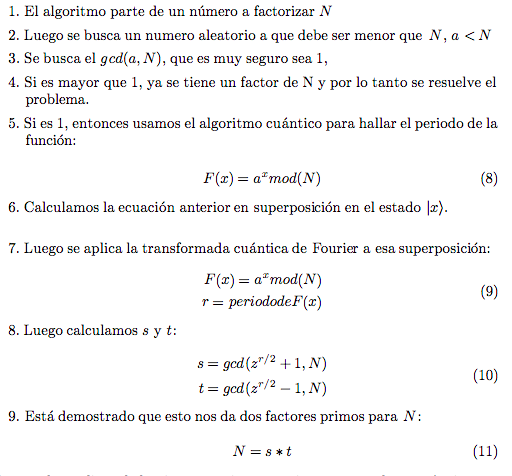

In [32]:
from math import gcd, ceil
import numpy as np
#from qof import qof


def shor_factorization(N, max_attempts=10):

    # Case N is even
    if N % 2 == 0:
        return 2, N // 2

    # Case N is prime power
    for b in range(2, ceil(np.log2(N))):
        a = N ** (1 / b)
        if a == int(a):
            return int(a), N // int(a)

    for attempt in range(max_attempts):
        print(f'Attempt {attempt}')

        # Chose random a value
        a = np.random.randint(2, N)
        while gcd(a, N) != 1:
            a = (a + 1) % N
        print(f'a = {a}')

        # Quantum order finding algorithm - take only one shot
        r_list = qof(a, N, 0.9, 10)
        print(f'r = {r_list}')

        for r in r_list:
            # Check if r is really period and also good value for shor factorization algorithm
            if r != 0 and r % 2 == 0 and (a ** (r / 2) + 1) % N != 0 and a ** r % N == 1:
                print(f'r = {r}')

                guesses = [gcd(a ** (r // 2) - 1, N), gcd(a ** (r // 2) + 1, N)]

                # Test guesses
                for guess in guesses:
                    if guess != 1 and guess != N and N % guess == 0:
                        return guess, N // guess

    else:
        return 1, N

In [31]:
def qof(a, N, eps, shots):

    L = ceil(np.log2(N))

    t = 2 * L + 1 + ceil(np.log(2 + 1 / (2 * eps)))
    qc = QuantumCircuit(t + L, t)

    # Initialize evaluation qubits
    for q in range(t):
        qc.h(q)

    # Auxiliary register in state |1>
    qc.x(t + L - 1)

    qc.barrier()

    # Controlled-U operations
    for q in range(t):
        qc.append(c_amodn(a, 2 ** q, N), [q] + list(range(t, t + L)))

    # Do inverse-QFT
    qc.barrier()
    inverse_QFT_gate = QFT(t, inverse=True, name='  IQFT').to_gate()
    qc.append(inverse_QFT_gate, range(t))

    print(qc)
    # Measure circuit
    qc.measure(range(t), range(t))

    # Simulate
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(transpile(qc, backend), shots=shots, memory=True)

    counts = job.result().get_memory()

    guess_list = []
    for output in counts:
        decimal = int(output, 2)
        phase = decimal / (2 ** t)
        frac = Fraction(phase).limit_denominator(N)
        guess_list.append(frac.denominator)

    return guess_list

In [30]:
import numpy as np
from math import gcd, ceil
from fractions import Fraction

from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit.library import QFT
from qiskit.extensions import UnitaryGate

def c_amodn(a, x, N):
    """Controlled multiplication by a mod N repeated x times"""

    if gcd(a, N) != 1:
        raise ValueError(f'a = {a} and N = {N} are not co-prime')

    L = ceil(np.log2(N))
    n_states = 2 ** L

    # Classical modular exponentiation
    outputs = np.zeros(n_states)
    for y in range(n_states):
        if y < N:
            outputs[y] = (y * a ** x) % N
        else:
            outputs[y] = y

    # Unitary matrix building by columns
    U = np.zeros((n_states, n_states), dtype=int)
    for y in range(n_states):
        for i in range(n_states):
            U[i][y] = 1 if outputs[y] == i else 0

    # Controlled
    c_U = UnitaryGate(U, label=f'{a}^{x} mod {N}').control()

    return c_U

<h1> Discrete Fourier Transform </h1>

$$
y_k=\frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}e^{\frac{2\pi i j k }{N}}x_j.
$$

When a periodic list of numbers is provided as input to $DFT$, then the transformed list have peaks around the integer multiples of $N/r$ where $N$ is the number of elements in the list and $r$ is the period.

In [22]:
from cmath import exp
from math import pi
from math import sqrt

def DFT(x):
    y=[]
    N = len(x)
    for k in range(N):
        s=0
        for j in range(N):
            s+= exp(2*pi*1j*j*k/N)*x[j]
        s*=1/sqrt(N)    
        y.append(s)
        
    #Visualize
    #import matplotlib.pyplot as plt
    #plt.plot(y)
    #plt.show()


    return y

In [23]:
x = [1,2,3,4,5]
DFT(x)

[(6.7082039324993685+0j),
 (-1.118033988749895-1.5388417685876266j),
 (-1.118033988749895-0.3632712640026799j),
 (-1.118033988749894+0.3632712640026811j),
 (-1.118033988749893+1.5388417685876274j)]

<h1> Quantum Fourier Transform </h1>

$$
\ket{\phi}=\sum_{k=0}^{N-1}y_k \ket{k} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \sum_{j=0}^{N-1}e^{\frac{2\pi i j k }{N}}x_j \ket{k},
$$

In [124]:
from cirq.circuits import InsertStrategy
from cirq import H, SWAP
import cirq

def qft(n,qubits,circuit):

    #For each qubit
    for i in range(n):
        #Apply Hadamard to the qubit
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW)
        
        #Apply CR_k gates where j is the control and i is the target
        k=2 #We start with k=2
        for j in range(i+1,n):
            #Define and apply CR_k gate  
            crk = CZPowGate(exponent = 2/2**(k))
            circuit.append(crk(qubits[j],qubits[i]))
            k=k+1 #Increment k at each step
 
    #Swap the qubits
    for i in range(n//2):
        circuit.append(SWAP(qubits[i],qubits[n-i-1]), strategy = InsertStrategy.NEW)     

In [125]:
import cirq 
from cirq import CZPowGate, X, H, SWAP
inputs = ['000','001','010','011','100','101','110','111']
n = 3

for input in inputs:

    #Create n qubits
    qubits=cirq.LineQubit.range(n)

    #Create circuit
    circuit = cirq.Circuit()
    
    #initialization
    if input[0]=='1':
        circuit.append(cirq.X(qubits[0]))
        
    if input[1]=='1':
        circuit.append(cirq.X(qubits[1]))
        
    if input[2]=='1':
        circuit.append(cirq.X(qubits[2]))
        

    #Call qft function
    qft(n,qubits,circuit)

    #Printing circuit
    print(circuit)

    #Simulating circuit
    print('Simulate the circuit:')
    s=cirq.Simulator()
    results=s.simulate(circuit)
    print(results) 

0: ───H───@───────@────────────────────────×───
          │       │                        │
1: ───────@^0.5───┼────────H───@───────────┼───
                  │            │           │
2: ───────────────@^0.25───────@^0.5───H───×───
Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: 0.354|000⟩ + 0.354|001⟩ + 0.354|010⟩ + 0.354|011⟩ + 0.354|100⟩ + 0.354|101⟩ + 0.354|110⟩ + 0.354|111⟩

phase:
output vector: |⟩
0: ───────H───@───────@────────────────────────×───
              │       │                        │
1: ───────────@^0.5───┼────────H───@───────────┼───
                      │            │           │
2: ───X───────────────@^0.25───────@^0.5───H───×───
Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2))
output vector: 0.354|000⟩ + (0.25+0.25j)|001⟩ + 0.354j|010⟩ + (-0.25+0.25j)|011⟩ - 0.354|100⟩ + (-0.25-0.25j)|101⟩ - 0.354j|110